In [1]:
import config
import numpy as np
import pandas as pd

# Baseline: Training datasets and store
- Time 1 (1 day)
- Time 10 (3 days)
- Time 14 (4 days)
- Time 18 (5 days)
- Time 22 (6 days)

In [2]:
'''import Test_without_Training

if __name__ == "__main__":
    for K in [1, 4, 8]:
        trainer = Test_without_Training.TremorModelTrainer(config, subject="Xianyu")
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../Results/Baseline_results_train_with_{K}data_X.csv')
# 저장해놨어서 데이터 업데이트 전에 한번 돌리면 굳이 안돌려도 됨'''

Dataset 1/10 - Session Exp_2025-06-24-v1/E9AD0E7DCC2B/
(8521, 4, 14, 1) (8521,)
Dataset 2/10 - Session Exp_2025-06-24-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 86.42%
Maximum validation accuracy : 88.37%
Accuracy of test dataset using model V0: 87.2093%
Dataset 3/10 - Session Exp_2025-06-26-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 78.7191%
Dataset 4/10 - Session Exp_2025-06-26-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 49.9415%
Dataset 5/10 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
There is more than one dataset - check
Accuracy on unseen dataset: 75.1719%
Dataset 6/10 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 71.5880%
Dataset 7/10 - Session Exp_2025-06-30-v1/FEFFF6FFF5FF/
Accuracy on unseen dataset: 88.0237%
Dataset 8/10 - Session Exp_2025-06-30-v2/FEFFF6FFF5FF/
Accuracy on unseen dataset: 55.8491%
Dataset 9/10 - Session Exp_2025-07-01-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset

In [2]:
b_path = 'C:/Users/hml76/PycharmProjects/Tremor_project_local/NCI_mindforce'
baseline_K = ['1', '4', '8']
baselines = []

for idx, K in enumerate(baseline_K):
    baselines.append(b_path + f'/github/Results/Baseline_results_train_with_{K}data_X.csv')

SUBJECT = "Xianyu"

# Training from scratch in every data
- Performance should be high
- Objective


Dataset 1/10 - Session Exp_2025-06-24-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 85.71%
Maximum validation accuracy : 88.26%

Dataset 2/10 - Session Exp_2025-06-24-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 84.8%
Maximum validation accuracy : 88.09%

Dataset 3/10 - Session Exp_2025-06-26-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 83.7%
Maximum validation accuracy : 89.83%

Dataset 4/10 - Session Exp_2025-06-26-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 65.1%
Maximum validation accuracy : 70.74%

Dataset 5/10 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
There is more than one dataset - check
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training

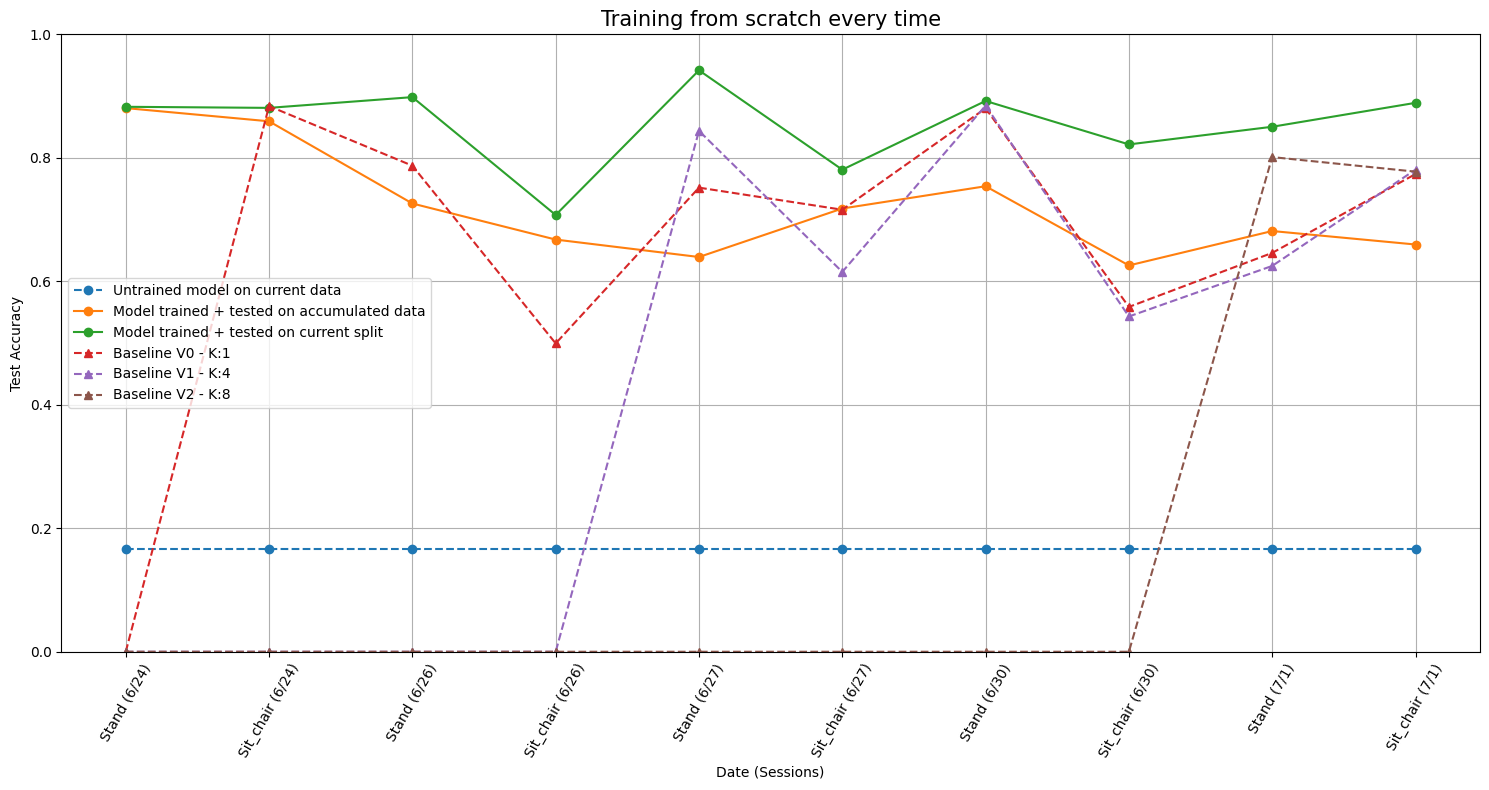

Average of acc without training anything (should be random): 5.46%
Average of acc using previous test data after training: 85.45%
Average of acc using current test data after training: 72.11%
Baseline K-1: 72.18%
Baseline K-4: 71.54%
Baseline K-8: 78.94%


In [3]:
import Training_from_scratch

prog_trainer = Training_from_scratch.ProgressiveTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)
prog_trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")

# Transfer Learning - Incremental : Model is cumulatively updated


Dataset 1/10 - Session Exp_2025-06-24-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 86.22%
Maximum validation accuracy : 88.96%

Dataset 2/10 - Session Exp_2025-06-24-v2/E9AD0E7DCC2B/

Initial Test Accuracy: 82.43%
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 78.97%
Maximum validation accuracy : 83.52%
Accuracy Improvement: 1.09%
	 ===> Positive

Dataset 3/10 - Session Exp_2025-06-26-v1/E9AD0E7DCC2B/

Initial Test Accuracy: 78.54%
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 81.32%
Maximum validation accuracy : 81.13%
Accuracy Improvement: 2.59%
	 ===> Positive

Dataset 4/10 - Session Exp_2025-06-26-v2/E9AD0E7DCC2B/

Initial Test Accuracy: 50.33%
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 49.41%
Maximum validation accuracy : 50.47%
Accuracy Improvement: 0

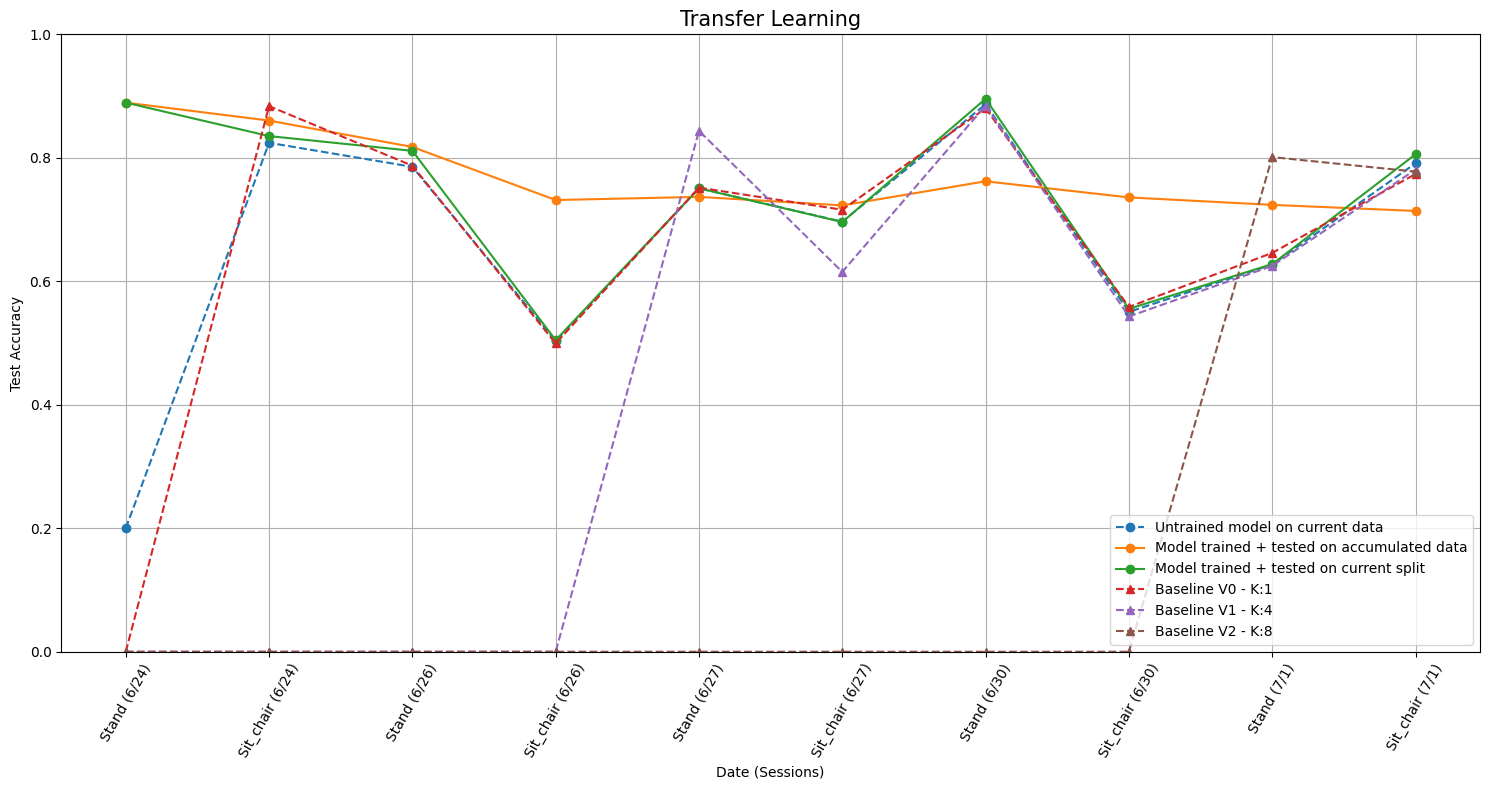

Average of acc without training this data (init; unseen) - incrementally trained model with previous datasets: 66.16%
Average of acc using previous test data after training (with increment): 76.94%
Average of acc using current test data after training (with increment): 73.72%
Baseline K-1: 72.18%
Baseline K-4: 71.54%
Baseline K-8: 78.94%


In [4]:
import Transfer_Learning

tl_trainer = Transfer_Learning.TransferLearningTrainer(config, subject=SUBJECT, increment_true_false="True")
Init_acc_all, Prev_acc_all, Trained_acc_all = tl_trainer.run(plot_learning_curve=False)   #True if want to see convergence for each session round
tl_trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training this data (init; unseen) - incrementally trained model with previous datasets: {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training (with increment): {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training (with increment): {np.mean(x)*100:.2f}%")

for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")

# Few-shot Learning (MAML) adaptation

Dataset 1/10 - Session Exp_2025-06-24-v1/E9AD0E7DCC2B/
Epoch 1: Loss=1.9917, Acc=0.3400
Epoch 11: Loss=1.1209, Acc=0.7700
Epoch 21: Loss=1.3768, Acc=0.7900
Epoch 31: Loss=1.6062, Acc=0.8000
Epoch 41: Loss=1.7322, Acc=0.8000
Dataset 2/10 - Session Exp_2025-06-24-v2/E9AD0E7DCC2B/
Dataset 3/10 - Session Exp_2025-06-26-v1/E9AD0E7DCC2B/
Dataset 4/10 - Session Exp_2025-06-26-v2/E9AD0E7DCC2B/
Dataset 5/10 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
There is more than one dataset - check
Dataset 6/10 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Dataset 7/10 - Session Exp_2025-06-30-v1/FEFFF6FFF5FF/
Dataset 8/10 - Session Exp_2025-06-30-v2/FEFFF6FFF5FF/
Dataset 9/10 - Session Exp_2025-07-01-v1/E9AD0E7DCC2B/
Dataset 10/10 - Session Exp_2025-07-01-v2/E9AD0E7DCC2B/


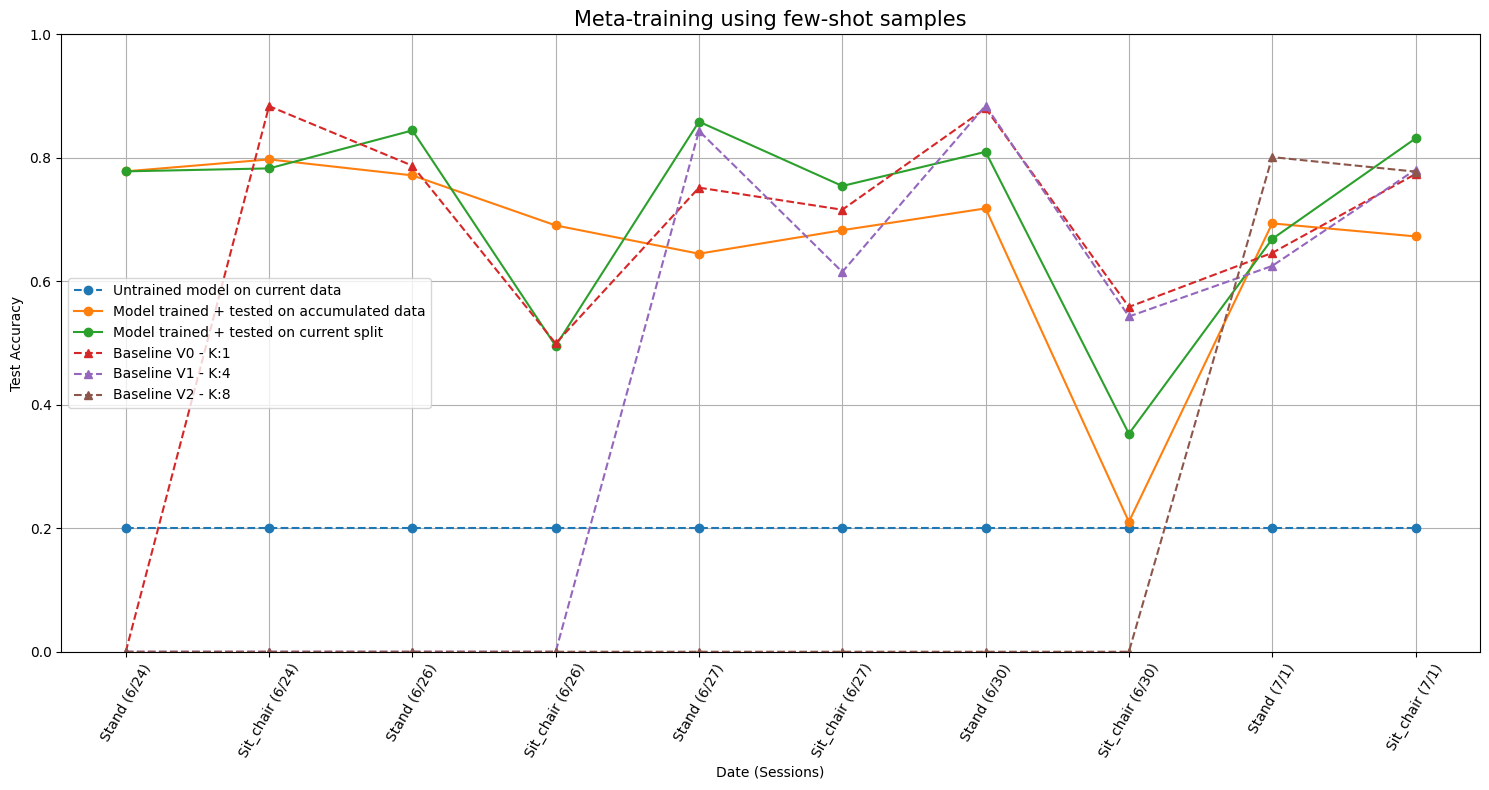

Average of acc without training anything (should be random): 20.00%
Average of acc using previous test data after training: 66.60%
Average of acc using current test data after training: 71.76%
Baseline K-1: 72.18%
Baseline K-4: 71.54%
Baseline K-8: 78.94%


In [5]:
import Few_shot_Learning

trainer = Few_shot_Learning.MAMLProgressiveTrainer(config, subject=SUBJECT, K_shot=10, query_size=100)
Init_acc_all, Prev_acc_all, Trained_acc_all = trainer.run()
trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")

for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")

# Continual Learning (EWC)

Dataset 1/10 - Session Exp_2025-06-24-v1/E9AD0E7DCC2B/
Start Training (total epochs: 20)...
Finish Training! (Model is saved)
Maximum training accuracy : 84.36%
Maximum validation accuracy : 89.38%
Dataset 2/10 - Session Exp_2025-06-24-v2/E9AD0E7DCC2B/
Dataset 3/10 - Session Exp_2025-06-26-v1/E9AD0E7DCC2B/
Dataset 4/10 - Session Exp_2025-06-26-v2/E9AD0E7DCC2B/
Dataset 5/10 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
There is more than one dataset - check
Dataset 6/10 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Dataset 7/10 - Session Exp_2025-06-30-v1/FEFFF6FFF5FF/
Dataset 8/10 - Session Exp_2025-06-30-v2/FEFFF6FFF5FF/
Dataset 9/10 - Session Exp_2025-07-01-v1/E9AD0E7DCC2B/
Dataset 10/10 - Session Exp_2025-07-01-v2/E9AD0E7DCC2B/


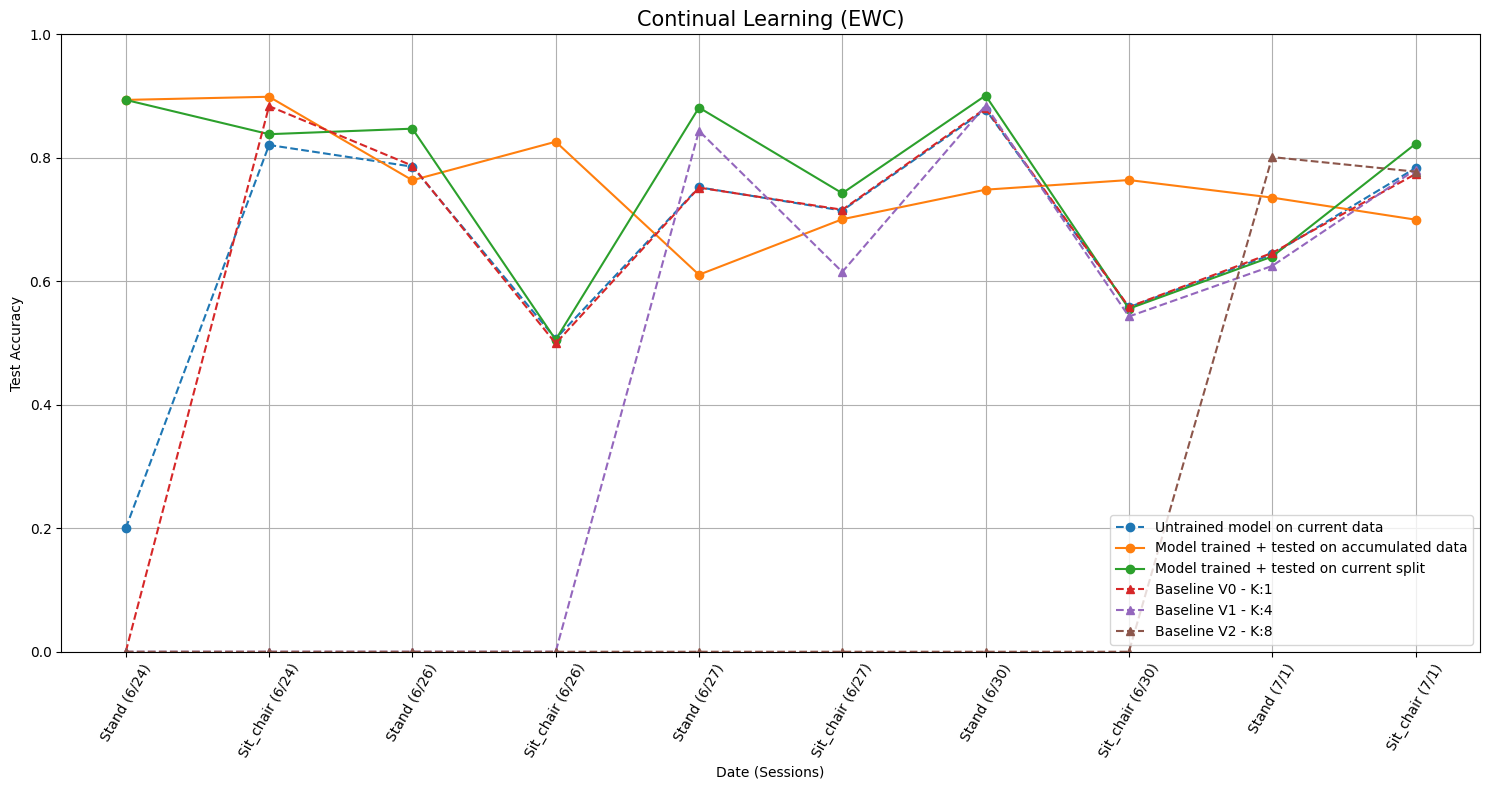

Average of acc without training this data (init; unseen): 66.43%
Average of acc using previous test data after training: 76.41%
Average of acc using current test data after training: 76.28%
Baseline K-1: 72.18%
Baseline K-4: 71.54%
Baseline K-8: 78.94%


In [6]:
import Continual_Learning_EWC_

cl_trainer = Continual_Learning_EWC_.ContinualLearningTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = cl_trainer.run()
cl_trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training this data (init; unseen): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")

for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")